# Mean Square Displacement (MSD)

This is an example for E-Cell4. Here, we explain how to take a mean square displacement for diffusing particles in three dimension.

In [1]:
import numpy as np
from ecell4 import *

In [2]:
D = 1
m = NetworkModel()
m.add_species_attribute(Species("A", "0.005", str(D)))

In [3]:
w = lattice.LatticeWorld(Real3(1, 1, 1), 0.005)
w.bind_to(m)
w.add_molecules(Species("A"), 480)

In [4]:
pids = [pid for pid, v in w.list_voxels()]

In [5]:
obs1 = FixedIntervalTrajectoryObserver(0.01, pids)
sim = lattice.LatticeSimulator(w)
sim.run(1, [obs1])

In [6]:
cfg = viz.plot_trajectory(obs1)

In [7]:
t = np.linspace(0, w.t(), obs1.num_steps())
data = obs1.data()

In [8]:
displacements = np.zeros(obs1.num_steps(), float)

for i in range(len(pids)):
    displacements += np.array(
        [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
             for pos in data[i]]) 
displacements /= len(pids)

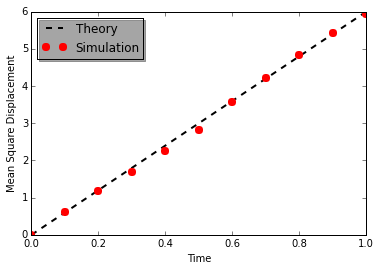

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(t, 6 * D * t, 'k--', label="Theory", lw=2)
plt.plot(t[:: 10], displacements[:: 10], 'ro', label="Simulation", mew=0, ms=8)
plt.xlim(t[0], t[-1])
plt.legend(loc="best", shadow=True)
plt.xlabel("Time")
plt.ylabel("Mean Square Displacement")
plt.show()